# Explore here

In [1]:
import pandas as pd

data_diab = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data_diab.shape

(768, 9)

In [3]:
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Existen un total de 768 filas  y 9 columnas, de entre las que encontramos el objetivo o clase a predecir, Outcome                   .
Ninguna variable cuenta con valores nulos.
Los datos cuentan con 9 características numéricas.

Eliminar duplicados

In [4]:
data_diab.drop("Outcome", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado.

Análisis de variables univariante
Análisis sobre variables numéricas

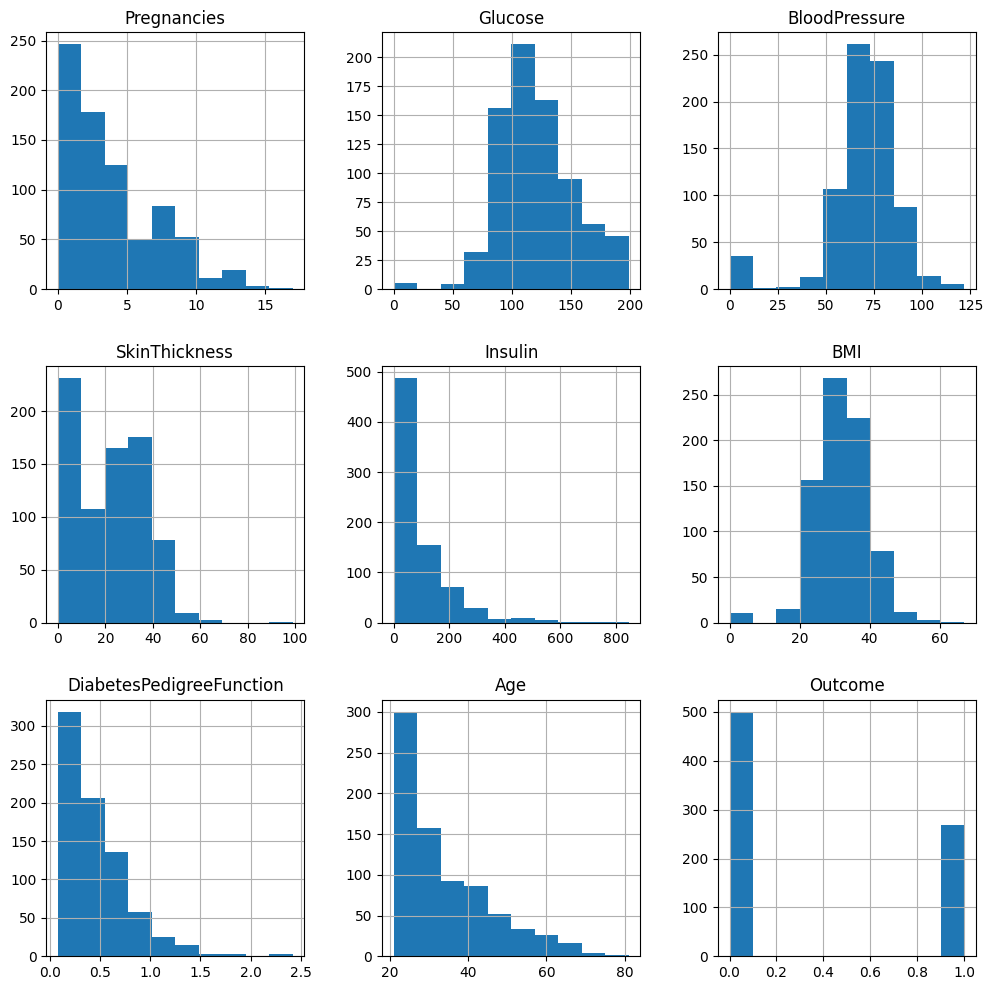

In [5]:
import matplotlib.pyplot as plt 

data_diab.hist(figsize=(12,12))
plt.show()

Pregnancies: entre 0 y 1 sus valores ascienden a 250 para luego ir descendiendo de manera positiva.
Glucose: entre 100 y 120 aproximadamente asciende a 250 y luego se distribuye en ambos lados a la izquierda con valores menores que en la cola positiva o de la derecha.
BloodPressure: presenta valores elevados entre 60 y 90 y se distruye de manera uniforme hacia ambos lados.
SkinThickness: valores elevados entre 0 y 10 y entre 20 y 40, el resto de la distribucion es variable.
Insulin: entre 0 y 10 asciende a 500 y de 10 a 800 va descendiendo en forma positiva.
BMI: entre 30 y 40 los valores ascienden a 250-300, luego se distribuyen de manera uniforme hacia ambos lados.
DiabetesPedigreeFunction: toma su valor mas alto en 300 entre 0.0 y 0.3 luego va descendiendo de forma positiva para el resto de los valores hasta 2.5.
Age: asciende a 300 entre 20 y 30 y luego va descendiendo de forma positiva para el resto de los valores.
Outcome: entre 0.0 y 0.1 asciende a 500 y entre 0.7 y 1.0 asciende a 280 aproximadamente
                                          

Análisis de variables multivariante
Análisis numérico-numérico

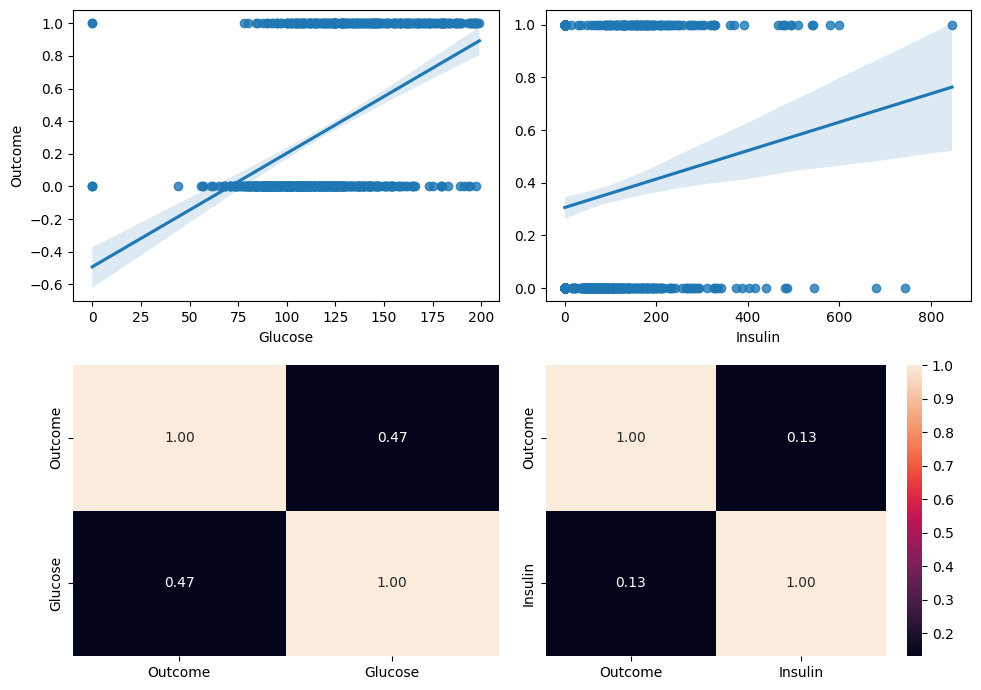

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_diab, x = "Glucose", y = "Outcome")
sns.heatmap(data_diab[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_diab, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(data_diab[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Outcome vs Glucose: a medida que aumenta la glucosa, la probabilidad de que Outcome sea 1 también aumenta. - La zona azul clara alrededor de la línea. Hay una relación positiva entre glucosa y Outcome. Niveles más altos de glucosa están asociados con una mayor probabilidad de que Outcome sea 1. Mientras que el diagrama de correlacion nos muestra un valor de 0.47 entre Outcome y Glucose.
Outcome vs Insulin: Hay una relación positiva entre insulina y Outcome, pero es más débil y menos segura que la relación con glucosa. Mientra que el diagrama de correlacion nos muestra un valor de 0.13 para Outcome vs Insulin.
Ambos gráficos sugieren que a medida que aumentan los niveles de glucosa o insulina, la probabilidad de que Outcome sea 1 aumenta. - La relación con glucosa parece más fuerte y más clara que con insulina. - Esto puede indicar que la glucosa es un mejor predictor del Outcome en este conjunto de datos. 


Análisis de correlaciones


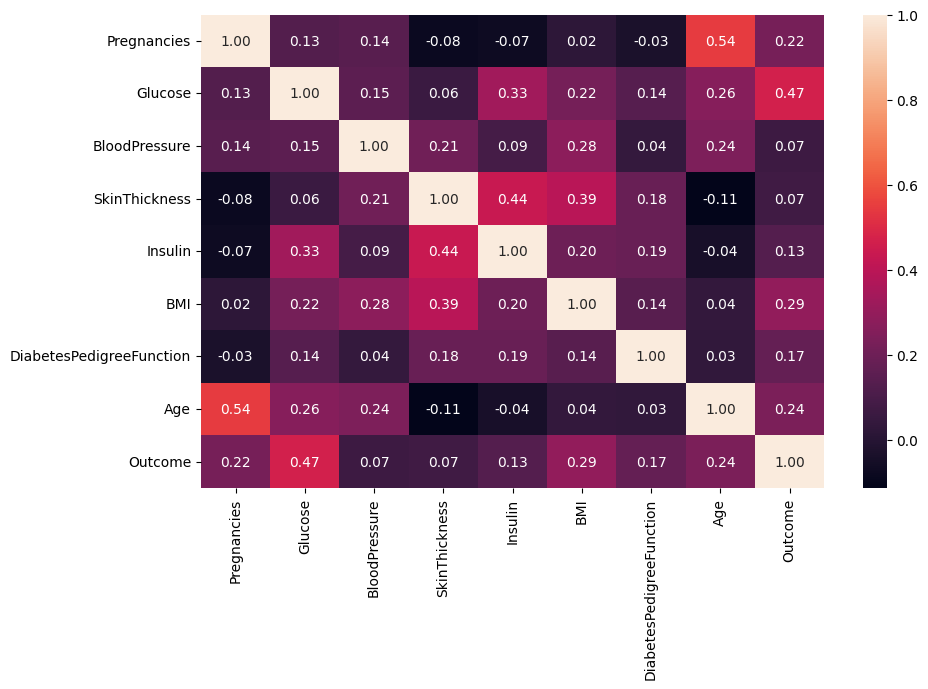

In [8]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data_diab[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlacion mas importante que podemos destacar es entre Outcome y Glucose con un valor de 0.47, tambien podemos destacar la correlacion entre SkinThickness e Insulin con un valor de 0.44, o esta misma variable con BMI presentando un valor de 0.39 y con BloodPressure de 0.21. Por otro lado la variable age presenta una correlacion de 0.24 con la variable objetivo en este caso Outcome y 0.54 con Pregnancies. Estos son los valores mas significativos que presenta el diagrama, el resto de valores no preentan significancia al analisis.